# Notebook describing the filtering of genebass traits

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import yaml
with open('config/config.yaml') as f:
    my_dict = yaml.safe_load(f)
DATADIR = my_dict['datadir']

We have a table of pre-annotated genes with p-values computed for the burden and SKAT-O tests. We filter for genes which have passed an initial QC and are below the p-value thresholds for burden and SKAT-O ($6.7 x 10^{-7}$ and $2.5 × 10^{−7}$ respectively).

In [3]:

gb_res = pd.read_parquet(f'{DATADIR}/genebass_500k/genebass_pvals_500k_selected_traits.parquet')

# Consider only significantly associated genes
gb_skato = gb_res.query('significant_skato == True and keep_gene_skato == True')
gb_burden = gb_res.query('significant_burden == True and keep_gene_burden == True')
gb_req = pd.concat([gb_burden,gb_skato])

gb_req = gb_req.drop_duplicates(subset=['gene_id','phenocode'])
gb_req

,gene_id,gene_symbol,annotation,phenocode,description,Pvalue,Pvalue_Burden,Pvalue_SKAT,significant_burden,significant_skato,keep_gene_skato,keep_gene_skat,keep_gene_burden
4304,ENSG00000001626,CFTR,pLoF,30750,Glycated haemoglobin (HbA1c),8.380039e-07,2.377425e-07,2.030577e-03,True,False,True,True,True
14257,ENSG00000004478,FKBP4,missense|LC,30850,Testosterone,2.458244e-07,5.071806e-08,1.830250e-03,True,True,True,True,True
19112,ENSG00000004939,SLC4A1,missense|LC,30260,Mean reticulocyte volume,2.155303e-10,5.055600e-11,1.015347e-02,True,True,True,True,True
19147,ENSG00000004939,SLC4A1,missense|LC,30270,Mean sphered cell volume,8.720409e-07,5.368904e-07,4.964834e-02,True,False,True,True,True
19197,ENSG00000004939,SLC4A1,pLoF,30010,Red blood cell (erythrocyte) count,7.185994e-15,2.120045e-14,8.896664e-07,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443965,ENSG00000285330,AC126283.2,missense|LC,30270,Mean sphered cell volume,9.764415e-10,5.920422e-06,1.840776e-09,False,True,True,True,True
5476040,ENSG00000116574,RHOU,pLoF,20518,Recent changes in speed/amount of moving or sp...,3.215382e-11,1.768953e-02,4.593403e-12,False,True,True,True,True
5476044,ENSG00000116574,RHOU,pLoF,20409,Frequency of feeling guilt or remorse after dr...,1.003652e-08,2.444983e-05,2.341261e-09,False,True,True,True,True
5476050,ENSG00000116574,RHOU,pLoF,20408,Frequency of memory loss due to drinking alcoh...,2.279128e-12,1.422388e-05,3.374266e-13,False,True,True,True,True


Filter for traits which are associated with more than 30 genes

In [3]:
count_mat = gb_req.groupby('description').count()
# count_mat
count_mat = count_mat.sort_values('gene_id',ascending=False)
mat_30genes = count_mat.query('gene_id >= 30')   
mat_30genes

,gene_id,gene_symbol,annotation,phenocode,Pvalue,Pvalue_Burden,Pvalue_SKAT,significant_burden,significant_skato,keep_gene_skato,keep_gene_skat,keep_gene_burden
description,,,,,,,,,,,,
Standing height,165,165,165,165,165,165,165,165,165,165,165,165
Recent changes in speed/amount of moving or sp...,133,133,133,133,133,126,126,133,133,133,133,133
Mean platelet (thrombocyte) volume,127,127,127,127,127,127,127,127,127,127,127,127
Frequency of failure to fulfil normal expectat...,120,120,120,120,120,108,108,120,120,120,120,120
Mean corpuscular haemoglobin,98,98,98,98,98,98,98,98,98,98,98,98
...,...,...,...,...,...,...,...,...,...,...,...,...
Arm predicted mass (left),32,32,32,32,32,32,32,32,32,32,32,32
Arm fat-free mass (left),31,31,31,31,31,31,31,31,31,31,31,31
Gamma glutamyltransferase,30,30,30,30,30,30,30,30,30,30,30,30


In [4]:
# Get genebass diseases with more than 30 genes
traits30 = mat_30genes.index.values
temp_mat = gb_req[gb_req['description'].isin(traits30)]
temp_mat

,gene_id,gene_symbol,annotation,phenocode,description,Pvalue,Pvalue_Burden,Pvalue_SKAT,significant_burden,significant_skato,keep_gene_skato,keep_gene_skat,keep_gene_burden
4304,ENSG00000001626,CFTR,pLoF,30750,Glycated haemoglobin (HbA1c),8.380039e-07,2.377425e-07,2.030577e-03,True,False,True,True,True
19112,ENSG00000004939,SLC4A1,missense|LC,30260,Mean reticulocyte volume,2.155303e-10,5.055600e-11,1.015347e-02,True,True,True,True,True
19147,ENSG00000004939,SLC4A1,missense|LC,30270,Mean sphered cell volume,8.720409e-07,5.368904e-07,4.964834e-02,True,False,True,True,True
19197,ENSG00000004939,SLC4A1,pLoF,30010,Red blood cell (erythrocyte) count,7.185994e-15,2.120045e-14,8.896664e-07,True,True,True,True,True
19206,ENSG00000004939,SLC4A1,pLoF,30240,Reticulocyte percentage,2.376058e-55,1.029301e-48,2.119238e-25,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435054,ENSG00000284824,GCSAML-AS1,missense|LC,30110,Platelet distribution width,1.368472e-08,5.007547e-03,1.410571e-08,False,True,True,True,True
5435072,ENSG00000284824,GCSAML-AS1,missense|LC,30100,Mean platelet (thrombocyte) volume,1.746143e-09,2.242092e-05,2.262209e-09,False,True,True,True,True
5443965,ENSG00000285330,AC126283.2,missense|LC,30270,Mean sphered cell volume,9.764415e-10,5.920422e-06,1.840776e-09,False,True,True,True,True
5476040,ENSG00000116574,RHOU,pLoF,20518,Recent changes in speed/amount of moving or sp...,3.215382e-11,1.768953e-02,4.593403e-12,False,True,True,True,True


Transform the above table to a simpler format

In [5]:
req_mat = temp_mat[['gene_id','description']]
req_mat = req_mat.rename(columns={'description':'disease'})
req_mat = req_mat.sort_values(by='disease')
req_mat['disease'] = ['_'.join(dis.split(' ')) for dis in req_mat['disease']]
req_mat

,gene_id,disease
1833061,ENSG00000131910,Alkaline_phosphatase
1438343,ENSG00000120659,Alkaline_phosphatase
1431521,ENSG00000120341,Alkaline_phosphatase
90019,ENSG00000012504,Alkaline_phosphatase
2944531,ENSG00000160325,Alkaline_phosphatase
...,...,...
2175504,ENSG00000138685,Whole_body_water_mass
3906554,ENSG00000176387,Whole_body_water_mass
280816,ENSG00000066827,Whole_body_water_mass
1389640,ENSG00000119403,Whole_body_water_mass


Check which genes are present in genebass but not in the list of protein coding genes. Filter out genes absent in either table.

In [7]:
coding_genes_path = 'resources/gene_annotation/mart_export.tsv'
coding_genes_df = pd.read_csv(coding_genes_path, sep='\t').rename(columns={'Gene stable ID':'gene_id'}).drop_duplicates().reset_index()
coding_genes = set(coding_genes_df.gene_id)
genebass_genes = set(req_mat.gene_id)

genes_not_in_coding = genebass_genes.difference(coding_genes)

genes_not_in_genebass = coding_genes.difference(genebass_genes)

print(len(genes_not_in_coding), len(genes_not_in_coding))

4 4


In [8]:
req_mat = req_mat[~req_mat.gene_id.isin(genes_not_in_coding)].reset_index()
req_mat

,index,gene_id,disease
0,1833061,ENSG00000131910,Alkaline_phosphatase
1,1438343,ENSG00000120659,Alkaline_phosphatase
2,1431521,ENSG00000120341,Alkaline_phosphatase
3,90019,ENSG00000012504,Alkaline_phosphatase
4,2944531,ENSG00000160325,Alkaline_phosphatase
...,...,...,...
3180,2175504,ENSG00000138685,Whole_body_water_mass
3181,3906554,ENSG00000176387,Whole_body_water_mass
3182,280816,ENSG00000066827,Whole_body_water_mass
3183,1389640,ENSG00000119403,Whole_body_water_mass


Save the filtered and reformatted table to desired location

In [9]:
req_mat.to_csv(f'{DATADIR}/input_data/disease_gene_eval/disease_gene_table_genebass500k_burden_or_skato.tsv', sep='\t', columns=('gene_id','disease'), index=False)
                                                                                

---
---

# Trait similarity computation

Here we compute the overlap of genes associated with traits. Traits which have too many genes overlapping can be omitted from the benchmark. The overlap is computed using a Jaccard index.

$ J_{ind} = \frac{genes_{trait1} \cap genes_{trait2}}{genes_{trait1} \cup genes_{trait2}}$

In [ ]:
import pandas as pd

gb_df = pd.read_csv(f'{DATADIR}input_data/disease_gene_eval/disease_gene_table_genebass500k_burden_or_skato.tsv', sep='\t')
dis_list = set(gb_df.disease)

Compute the Jaccard index

In [3]:
import numpy as np
import itertools
from concurrent.futures import ProcessPoolExecutor

def Jaccard_index(dataframe, dis1, dis2):
    dis1_genes = set(dataframe[dataframe.disease == dis1]['gene_id'])
    dis2_genes = set(dataframe[dataframe.disease == dis2]['gene_id'])
    j = len(dis1_genes.intersection(dis2_genes))/len(dis1_genes.union(dis2_genes))
    return j

gene_list = set(gb_df['gene_id'])
len(gene_list)

dis_list = list(set(gb_df['disease']))
J_ind = pd.DataFrame(np.zeros((len(dis_list),len(dis_list))),columns=dis_list, index=dis_list)

for i in range(len(dis_list)):
    J_ind.iloc[i][i] = 1

with ProcessPoolExecutor() as executor:
    for subset in itertools.combinations(dis_list, 2):
        future = executor.submit(Jaccard_index, gb_df, subset[0], subset[1])
        J_ind[subset[0]][subset[1]] = future.result()
        J_ind[subset[1]][subset[0]] = J_ind[subset[0]][subset[1]]



Compute the clustering of traits based on the Jaccard index.

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - J_ind
Z = linkage(squareform(dissimilarity), 'complete')

threshold = 0.7
labels = fcluster(Z, threshold, criterion='distance')

print(labels)

lut = dict(zip(dis_list,labels))
sort_lut = sorted(lut.items(), key=lambda x:x[1])
lut_dict = dict(sort_lut)

# print(lut_dict)

[29 13 20  4 15  7  1 25 34 22 26 31  9 26 26 26 33 26 23 26 21 26 18  5
  2 11 34 24 28  6 26 34 20 29 30 28 26 22 26 33 16 17 26  8  6 26 14 27
 21 33 30 10 23 34 32 34 19 17 12  7  3]
{'Creatinine': 1, 'Cystatin_C': 2, 'Urate': 3, 'IGF-1': 4, 'SHBG': 5, 'Apolipoprotein_B': 6, 'Cholesterol': 6, 'Apolipoprotein_A': 7, 'HDL_cholesterol': 7, 'Triglycerides': 8, 'Gamma_glutamyltransferase': 9, 'Alkaline_phosphatase': 10, 'Frequency_of_inability_to_cease_drinking_in_last_year': 11, 'Frequency_of_memory_loss_due_to_drinking_alcohol_in_last_year': 12, 'Frequency_of_failure_to_fulfil_normal_expectations_due_to_drinking_alcohol_in_last_year': 13, 'Recent_changes_in_speed/amount_of_moving_or_speaking': 14, 'Platelet_distribution_width': 15, 'Mean_platelet_(thrombocyte)_volume': 16, 'Platelet_count': 17, 'Platelet_crit': 17, 'Lymphocyte_count': 18, 'Monocyte_count': 19, 'Eosinophill_count': 20, 'Eosinophill_percentage': 20, 'Lymphocyte_percentage': 21, 'Neutrophill_percentage': 21, 'Neutrophill

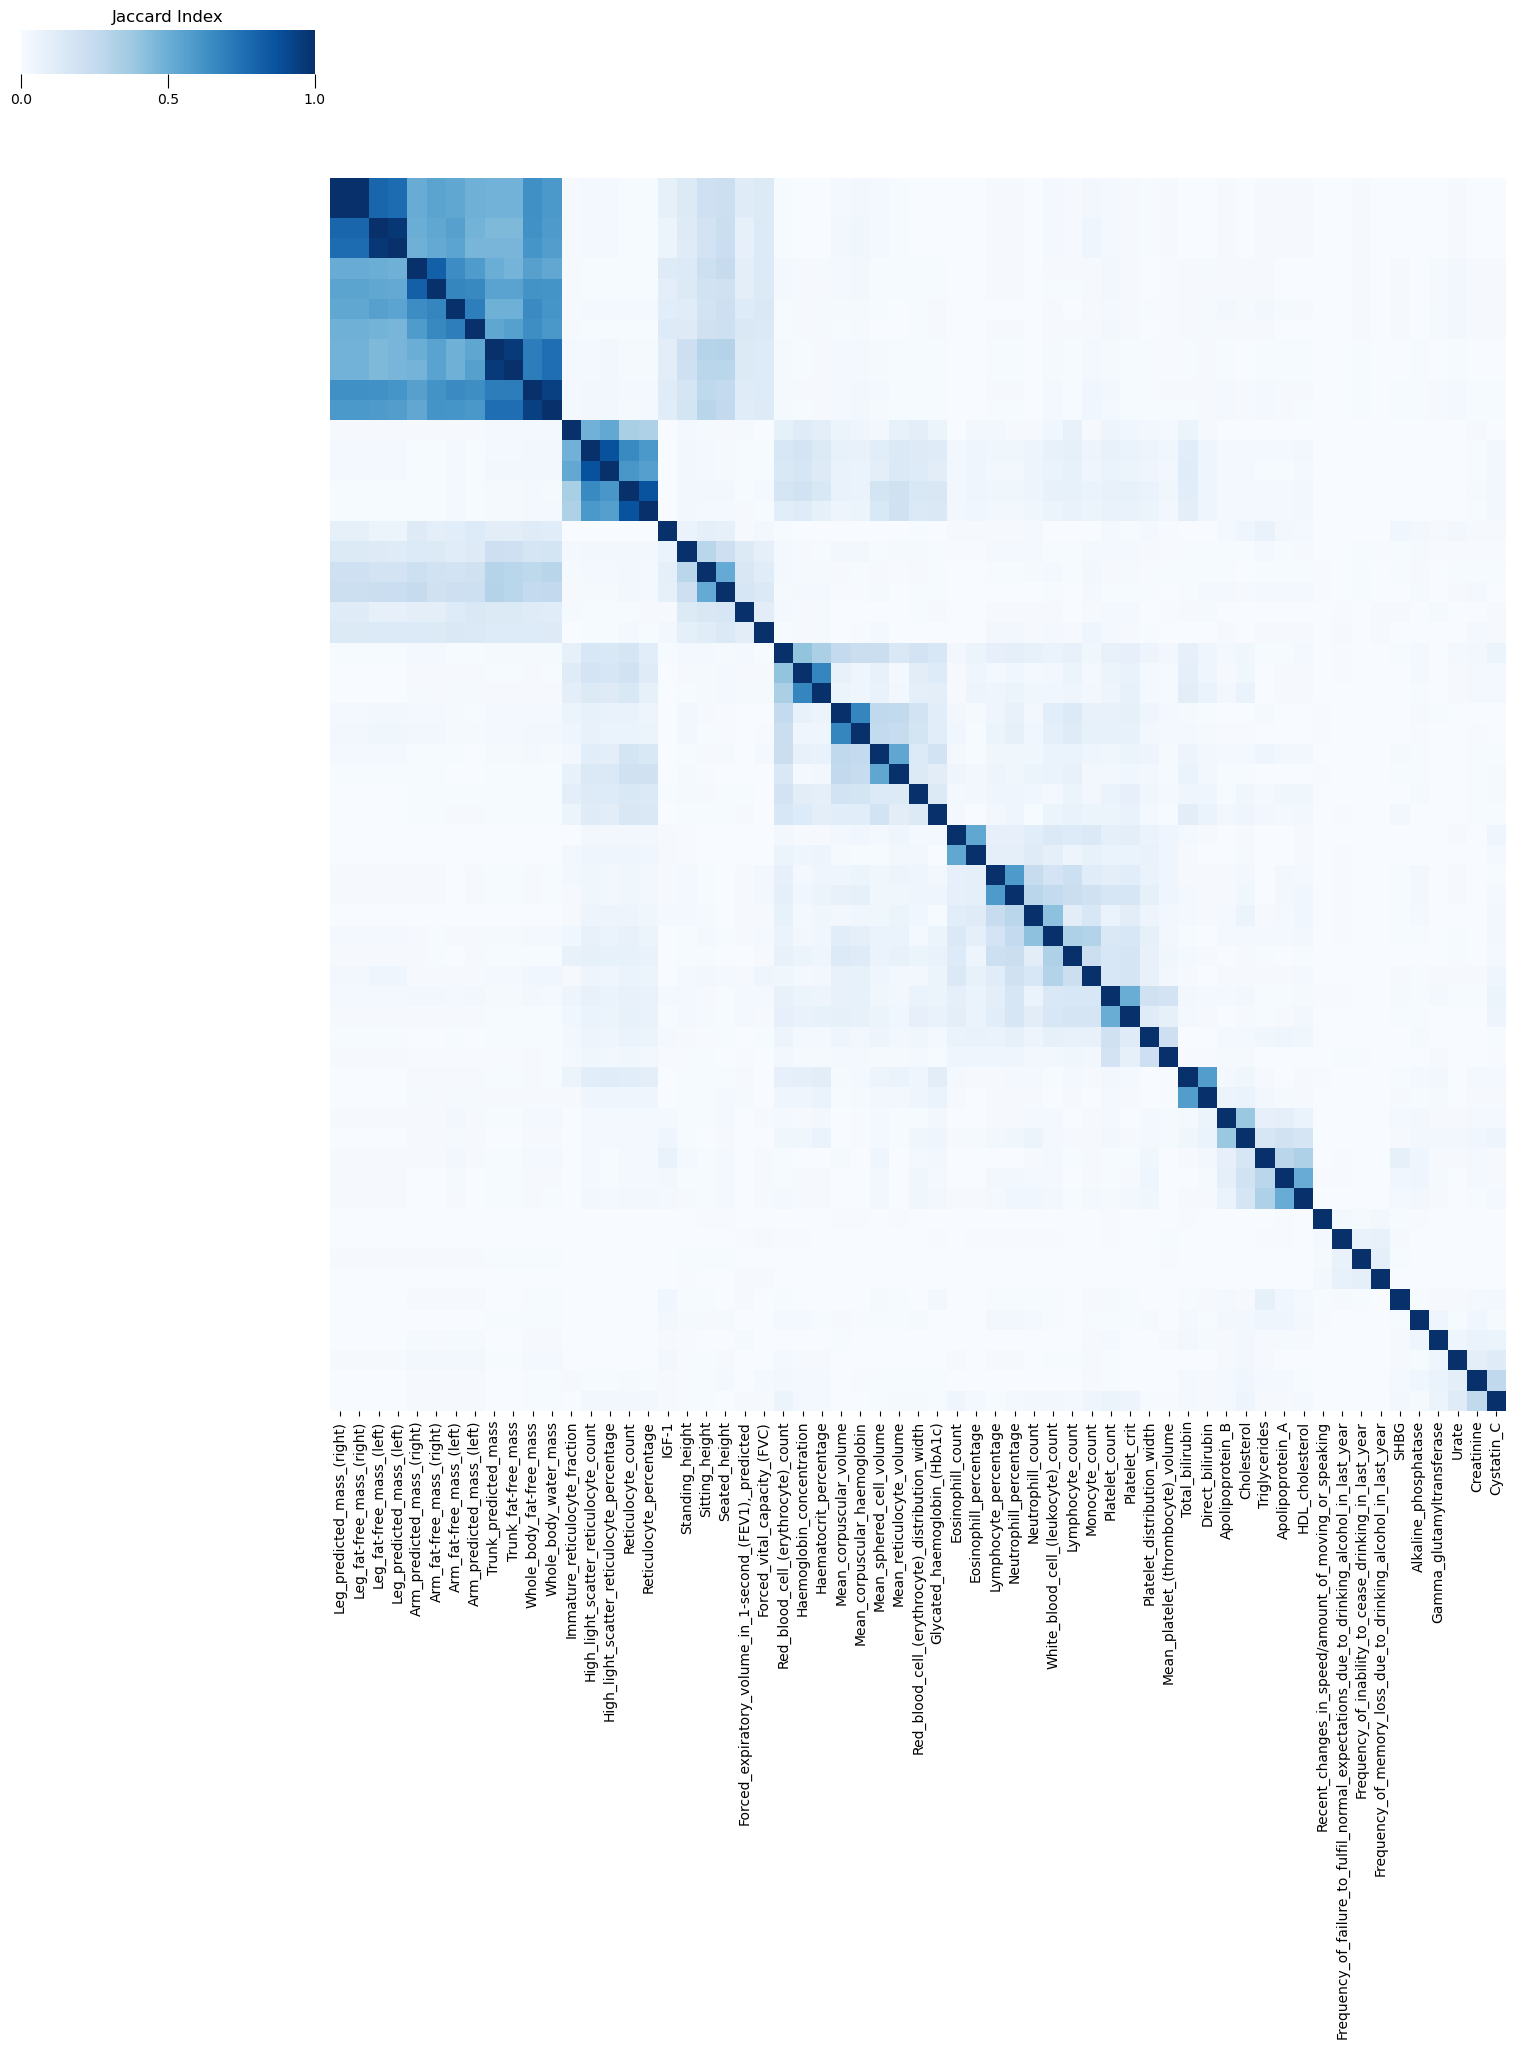

In [21]:
import seaborn as sns

kws = dict(cbar_kws=dict(ticks=[0, 0.50, 1], orientation='horizontal'))

cg = sns.clustermap(J_ind, cmap="Blues", figsize=(15,22), xticklabels=True, yticklabels=False, **kws)

cg.ax_cbar.set_position([0, 0.9, cg.ax_row_dendrogram.get_position().width, 0.02])
cg.ax_cbar.set_title('Jaccard Index')
cg.ax_cbar.tick_params(axis='x', length=10)


cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)